In [2]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import importlib

import datasets as ds
importlib.reload(ds)

import utils 

OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "c:\Users\giaco\anaconda3\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [2]:
print("Cuda OK?:", torch.cuda.is_available())
print("Tensor test:", torch.tensor([3, 4, 5], device='cuda'))

for i in range(torch.cuda.device_count()):
  print(torch.cuda.get_device_name(i))
  print(torch.cuda.get_device_capability(i))
  # print(torch.cuda.get_device_properties(i))

Cuda OK?: True
Tensor test: tensor([3, 4, 5], device='cuda:0')
NVIDIA GeForce RTX 2070 SUPER
(7, 5)


Loading synROD train
Loading synROD test
Loading ROD


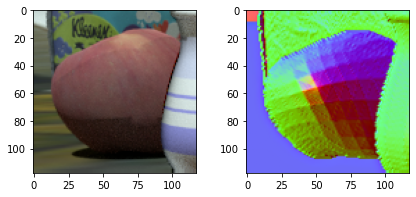

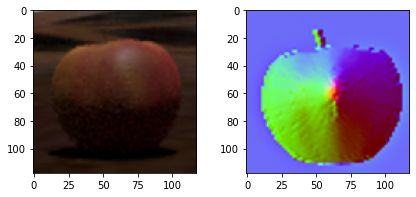

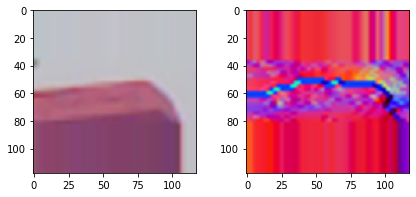

In [3]:

def test_dataset(ds, idx=0):
  loader = DataLoader(ds, 64, shuffle=False)

  rgb_image, d_image, label = next(iter(loader))
  r, d, y = rgb_image[idx], d_image[idx], label[idx]

  fig, axs = plt.subplots(1, 2, figsize=(7, 3))
  utils.show_image(r, ax=axs[0])
  utils.show_image(d, ax=axs[1])

srod = ds.SynRODDataset('data', image_size=118, train=True, download=True)
srod_test = ds.SynRODDataset('data', image_size=118, train=False, download=True)
rod = ds.RODDataset('data', train=True, image_size=118, download=True)



test_dataset(srod)
test_dataset(srod_test)
test_dataset(rod)

Loading synROD train


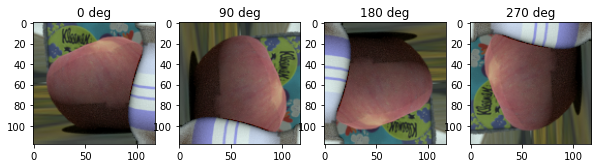

In [5]:
# TEST ROTATION
f, axarr = plt.subplots(1, 4, figsize=(10, 3))

srod = ds.SynRODDataset(root="data", image_size=118, train=True)
ri, di, li = srod.__getitem__(0)

for r, ax in enumerate(axarr):
  ax.set_title(f"{r*90} deg")
  utils.show_image(utils.rotate_image(ri, r), ax=ax)

Loading synROD train
Loading ROD


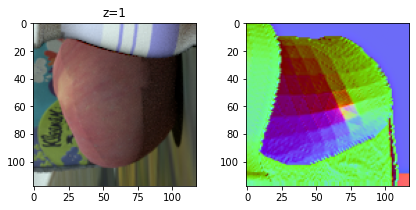

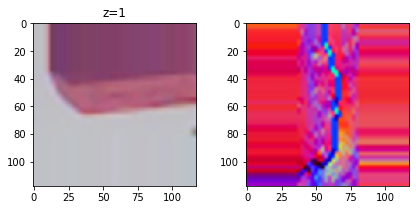

In [4]:
# TEST PRETEXT DATABASES
def test_pretext_dataset(rod, idx=0):
  loader = DataLoader(rod, 64, shuffle=False)

  rgb_image, d_image, label = next(iter(loader))

  r, d, z = rgb_image[idx], d_image[idx], label[idx]

  fig, ax = plt.subplots(1, 2, figsize=(7, 3))
  utils.show_image(r, ax=ax[0])
  utils.show_image(d, ax=ax[1])
  ax[0].set_title(f"z={z}")

srod = ds.PretextSynRODDataset('data', image_size=118, train=True, download=True)
test_pretext_dataset(srod)

rod = ds.PretextRODDataset('data', image_size=118, train=True, download=True)
test_pretext_dataset(rod)

In [7]:
# Network shapes test

import networks as nt
importlib.reload(nt)
from torch import nn

srod = ds.SynRODDataset(root="data", image_size=224, train=True)
dl = DataLoader(srod, batch_size=3)
rgb_batch, di, y = next(iter(dl))


model_E = nt.FeatureExtractor()
f = model_E(rgb_batch)
print("Feature shape:", f.shape)

model_T = nt.RecognitionClassifier(in_channels=512, out_classes=51)
y_T = model_T(f)
print("T output shape:", y_T.shape)

model_P = nt.RotationClassifier(in_channels=512, out_classes=4)
y_P = model_P(f)
print("P output shape:", y_P.shape)


Loading synROD train
Feature shape: torch.Size([3, 512, 7, 7])
T output shape: torch.Size([3, 51])
P output shape: torch.Size([3, 4])


In [15]:
import importlib
import utils
importlib.reload(utils)
from tqdm import tqdm

srod = ds.SynRODDataset(root="data", image_size=224, train=False)
dl = DataLoader(srod, batch_size=256, shuffle=False, num_workers=2)

iter_syn = utils.LoaderIterator(dl, skip_last=True, infinite=True)

# i=0
# for r, d, l in iter_syn:
#   i+=1
#   print(i, r.shape, l[3])

for i in range(50):
  r, d, y = next(iter_syn)
  print(i, y.shape, y[3])


0 torch.Size([256]) tensor(0)
1 torch.Size([256]) tensor(2)
2 torch.Size([256]) tensor(4)
3 torch.Size([256]) tensor(5)
4 torch.Size([256]) tensor(7)
5 torch.Size([256]) tensor(9)
6 torch.Size([256]) tensor(10)
7 torch.Size([256]) tensor(11)
8 torch.Size([256]) tensor(13)
9 torch.Size([256]) tensor(14)
10 torch.Size([256]) tensor(17)
11 torch.Size([256]) tensor(18)
12 torch.Size([256]) tensor(20)
13 torch.Size([256]) tensor(21)
14 torch.Size([256]) tensor(23)
15 torch.Size([256]) tensor(24)
16 torch.Size([256]) tensor(26)
17 torch.Size([256]) tensor(27)
18 torch.Size([256]) tensor(29)
19 torch.Size([256]) tensor(31)
20 torch.Size([256]) tensor(32)
21 torch.Size([256]) tensor(34)
22 torch.Size([256]) tensor(36)
23 torch.Size([256]) tensor(37)
24 torch.Size([256]) tensor(39)
25 torch.Size([256]) tensor(41)
26 torch.Size([256]) tensor(42)
27 torch.Size([256]) tensor(44)
28 torch.Size([256]) tensor(0)
29 torch.Size([256]) tensor(2)
30 torch.Size([256]) tensor(4)
31 torch.Size([256]) tensor

In [1]:
ds1 = ds.PretextSynRODDataset("data", train=False)
ld1 = DataLoader(ds1, batch_size=12)

r, d, y = next(ld1)

utils.show_image(r[0])

NameError: name 'ds' is not defined